## Step 0: Importing Libraries and CSV file

In [1]:
# Importing libraries to handle data
import pandas as pd
import numpy as np

# Importing libraries for graph plottings
import graphviz
import matplotlib.pyplot as plt

import scipy
# From scipy import stats-related libraries
import seaborn as sns
import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split   
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from statistics import mean

# Importing Linear Regression
from sklearn.linear_model import LinearRegression
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# Importing libraries for creating pipeline
from sklearn.pipeline import Pipeline

# pd.set_option('display.max_columns', None,'display.max_row', None)

In [2]:
#Read CSV
df=pd.read_csv("unified_csv.csv")
df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 4050 non-null   object 
 1   status                                       4050 non-null   object 
 2   category_group_list                          4050 non-null   object 
 3   num_funding_rounds                           4050 non-null   float64
 4   total_funding_usd                            4050 non-null   float64
 5   founded_on                                   4050 non-null   float64
 6   employee_count                               4050 non-null   object 
 7   cat_commerce_shopping                        4050 non-null   float64
 8   cat_fin_services                             4050 non-null   float64
 9   cat_lending_invests                          4050 non-null   float64
 10  

In [3]:
df['employee_count'].value_counts()

def mapping (col):
    if col == "1-10":
        return 1
    elif col == "11-50":
        return 2
    elif col == "51-100":
        return 3
    elif col == "101-250":
        return 4
    elif col == "251-500":
        return 5
    elif col == "501-1000":
        return 6
    elif col == "10000+":
        return 7
    else:
        return 0

df['employee_count'] = df['employee_count'].apply(mapping)

best_4000 = df

## Step 1.1: Predicting closed / not closed / success using logistic regression

In [4]:
y = df['status_closed']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


# Drop away all closed companies, avoid false positive
pred_arr = logreg.predict(df.iloc[:,5:88])
to_be_dropped = []
for i in range(len(df)):
    if pred_arr[i] == 1:
       to_be_dropped.append(i)
df.drop(to_be_dropped, inplace = True)
df = df.reset_index(drop = True)

Accuracy of logistic regression classifier on predicting closed company: 0.97
[[1176    0]
 [  39    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1176
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1215
   macro avg       0.48      0.50      0.49      1215
weighted avg       0.94      0.97      0.95      1215



In [5]:
"""
#step 1.2 predicting being acquired or undergo ipo
y = df['has_acquisitions']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting being acquired: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
"""
# cannot predict any has acquisitions

"\n#step 1.2 predicting being acquired or undergo ipo\ny = df['has_acquisitions']\nX = df.iloc[:,5:88]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\n\ny_pred = logreg.predict(X_test)\nprint('Accuracy of logistic regression classifier on predicting being acquired: {:.2f}'.format(logreg.score(X_test, y_test)))\n\nprint(confusion_matrix(y_test, y_pred))\n\nprint(classification_report(y_test, y_pred))\n"

In [6]:
"""
y = df['has_ipo']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
"""
# cannot predict any has ipo

"\ny = df['has_ipo']\nX = df.iloc[:,5:88]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\n\ny_pred = logreg.predict(X_test)\nprint('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))\n\nprint(confusion_matrix(y_test, y_pred))\n\nprint(classification_report(y_test, y_pred))\n"

## Step 1.2: Predicting those above 50% threshold of average momentum using logistic regression

In [7]:
X = df.iloc[:,5:88]
y2 = df['average_momentum']
y2_threshold = np.percentile(y2, [50])
y2 = y2.apply(lambda x: 1 if x >= y2_threshold else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on av_momentum with 50% as threshold: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


# Drop away all companies below threshold using av_momentum as predictor, avoid false positive
pred_arr = logreg.predict(df.iloc[:,5:88])
to_be_dropped = []
for i in range(len(df)):
    if pred_arr[i] == 0:
       to_be_dropped.append(i)
df.drop(to_be_dropped, inplace = True)
df = df.reset_index(drop = True)

Accuracy of logistic regression classifier on av_momentum with 50% as threshold: 0.58
[[255 360]
 [147 453]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       615
           1       0.56      0.76      0.64       600

    accuracy                           0.58      1215
   macro avg       0.60      0.58      0.57      1215
weighted avg       0.60      0.58      0.57      1215



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 2680 non-null   object 
 1   status                                       2680 non-null   object 
 2   category_group_list                          2680 non-null   object 
 3   num_funding_rounds                           2680 non-null   float64
 4   total_funding_usd                            2680 non-null   float64
 5   founded_on                                   2680 non-null   float64
 6   employee_count                               2680 non-null   int64  
 7   cat_commerce_shopping                        2680 non-null   float64
 8   cat_fin_services                             2680 non-null   float64
 9   cat_lending_invests                          2680 non-null   float64
 10  

In [9]:
#Preparing xlabel and ylabel
features= df.iloc[:,0:88]

ylabel=df[["average_momentum"]]

features.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,...,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,All of Us,operating,"Financial Services,Lending and Investments",3.0,4025000.0,4.0767,1,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,PayPlug,acquired,"Commerce and Shopping,Financial Services,Payments",5.0,13316538.0,8.7507,2,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,AID:Tech,operating,"Financial Services,Government and Military,Inf...",10.0,3180350.0,4.7068,2,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,OwlTing,operating,"Commerce and Shopping,Mobile,Other,Travel and ...",4.0,5700000.0,10.4164,4,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,SaveUp,operating,"Education,Financial Services,Internet Services...",2.0,7000000.0,9.8356,2,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#print value_counts of each column of feature dataframe
for i in features.columns: 
    x= features[i].value_counts()
    print("column: ",i,", value is:",x)
    print()

column:  company_name , value is: Upside            3
Jasper            2
Spiff             2
Float             2
Canopy            2
                 ..
Strategic Blue    1
Bluzelle          1
Divido            1
Unit              1
Jinba Chuanmei    1
Name: company_name, Length: 2670, dtype: int64

column:  status , value is: operating    2375
acquired      189
closed         98
ipo            18
Name: status, dtype: int64

column:  category_group_list , value is: Financial Services                                                                                               247
Unknown                                                                                                          134
Financial Services,Lending and Investments                                                                       128
Financial Services,Software                                                                                       56
Financial Services,Other                                     

In [11]:
#print value_counts of each column of ylabel dataframe
for i in ylabel.columns: 
    x= ylabel[i].value_counts()
    print("column: ",i,", value is:",x)
    print()

column:  average_momentum , value is: -0.333333    4
 0.797819    2
 1.200000    2
 0.352941    2
 0.714286    2
            ..
 1.913175    1
 0.638834    1
 0.329653    1
 0.996470    1
 1.250000    1
Name: average_momentum, Length: 2663, dtype: int64



In [12]:
###### DO qcut for all ylabels ####### 

binary_labels = [0,1]

ylabel["average_momentum"]= pd.qcut(ylabel["average_momentum"], 2, labels = binary_labels)

ylabel

,average_momentum
0,1
1,1
2,0
3,0
4,1
...,...
2675,0
2676,0
2677,1
2678,0


In [13]:
#Train model to predict each ylabel

X_train, X_test, y_train, y_test = train_test_split(features.drop(columns=['company_name', 'status', 'category_group_list', 'num_funding_rounds','total_funding_usd']), ylabel["average_momentum"], test_size=0.3, random_state=5)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
    
# use the trained model to predict test set for evaluation
pred_test = model.predict(X_test)

# print out evaluation result
print("Predicting: ", i)
    
print("Accuracy:{}".format(accuracy_score(y_test, pred_test, normalize=True, sample_weight=None)))
print("Classification Report:\n{}".format(classification_report(y_test, pred_test)))
print("Confusion Matrix:\n{}".format(confusion_matrix(y_test, pred_test)))
print("--------------------------------------------------------------------------")
prediction=model.predict(features.drop(columns=['company_name', 'status', 'category_group_list', 'num_funding_rounds','total_funding_usd']))
result = features
result["tree_prediction"]=prediction

Predicting:  average_momentum
Accuracy:0.5708955223880597
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       399
           1       0.57      0.58      0.58       405

    accuracy                           0.57       804
   macro avg       0.57      0.57      0.57       804
weighted avg       0.57      0.57      0.57       804

Confusion Matrix:
[[224 175]
 [170 235]]
--------------------------------------------------------------------------


In [14]:
result["tree_prediction"].value_counts()

1    1345
0    1335
Name: tree_prediction, dtype: int64

In [15]:
result["average_momentum"]= df["average_momentum"]
result= result.reset_index()
result= result.drop(columns= ["index"])
result.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,...,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum
0,All of Us,operating,"Financial Services,Lending and Investments",3.0,4025000.0,4.0767,1,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,2.964229
1,PayPlug,acquired,"Commerce and Shopping,Financial Services,Payments",5.0,13316538.0,8.7507,2,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0.934681
2,AID:Tech,operating,"Financial Services,Government and Military,Inf...",10.0,3180350.0,4.7068,2,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0.228600
3,OwlTing,operating,"Commerce and Shopping,Mobile,Other,Travel and ...",4.0,5700000.0,10.4164,4,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.341418
4,SaveUp,operating,"Education,Financial Services,Internet Services...",2.0,7000000.0,9.8356,2,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0.854750


## Step 2: Predicting those above 50% threshold of average momentum by Decision Tree

In [16]:
# Drop away those below median as the average momentum threshold, predicted by decision tree
# Double Confirmation of NO FALSE POSITIVE
to_be_dropped = []
for i in range (len(result)):
    if result['tree_prediction'].iloc[i] == 0:
        to_be_dropped.append(i)
result.drop(to_be_dropped, inplace = True)
result = result.reset_index(drop = True)

In [17]:
df = result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 90 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 1345 non-null   object 
 1   status                                       1345 non-null   object 
 2   category_group_list                          1345 non-null   object 
 3   num_funding_rounds                           1345 non-null   float64
 4   total_funding_usd                            1345 non-null   float64
 5   founded_on                                   1345 non-null   float64
 6   employee_count                               1345 non-null   int64  
 7   cat_commerce_shopping                        1345 non-null   float64
 8   cat_fin_services                             1345 non-null   float64
 9   cat_lending_invests                          1345 non-null   float64
 10  

## Step 3: Predicting the best momentum venture companies by Polynomial Regression

Accuracy Score of Degree 1 model:  0.1128343805070886


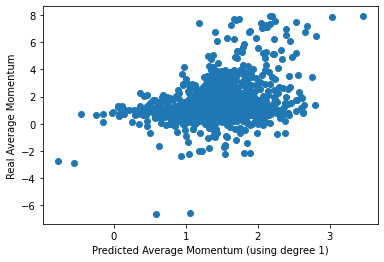

In [18]:
# ###### Try: Degree 1 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=1)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 1 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_1 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_1, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 1)")
plt.ylabel("Real Average Momentum")
plt.show()

Accuracy Score of Degree 2 model:  0.7407541441832097


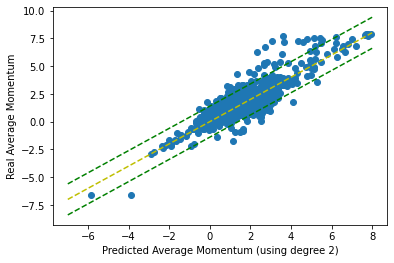

In [19]:
# ###### Try: Degree 2 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 2 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_2 = pr_model.predict(x_poly)

# plot ideal line and prediction interval (assume real avg momentum directly maps to some x)
x = np.linspace(-7, 8, 1338)
s_e = math.sqrt(mean_squared_error(df.iloc[:,-1], y_pred_2) * len(df) / (len(df)-2))
# the comments below don't work
# sx_squared = df.iloc[:,-1].var()
# se = s_e * np.sqrt(1 + 1/len(df) + np.square(y_pred_2-df.iloc[:,-1].to_numpy())/((len(df)-1)*sx_squared))
se = s_e
t_value = scipy.stats.t.ppf(1-0.025,df=len(df)-2)
lower_bound = x - t_value*se
upper_bound = x + t_value*se
plt.plot(x, x, 'y--')
plt.plot(x, lower_bound, 'g--')
plt.plot(x, upper_bound, 'g--')

# # Plot our model on our data
plt.scatter(y_pred_2, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 2)")
plt.ylabel("Real Average Momentum")
plt.show()

Accuracy Score of Degree 3 model:  0.2801588702998533


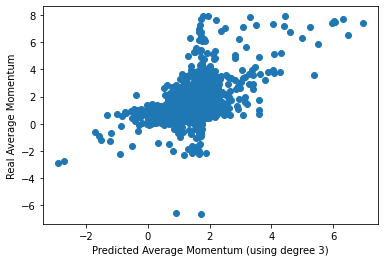

In [20]:
# ###### Try: Degree 3 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=3)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 3 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_3 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_3, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 3)")
plt.ylabel("Real Average Momentum")
plt.show()

In [21]:
"""
# ###### Try: Degree 4 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=4)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# # Store our predicted ROI values in the variable y_pred
y_pred_4 = pr_model.predict(x_poly)

# # Plot our model on our data
plt.scatter(y_pred_4, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 4)")
plt.ylabel("Real Average Momentum")
plt.show()
"""

'\n# ###### Try: Degree 4 #######\n\nfeatures = df.iloc[:,5:-1]\n\n# # define independent variables/attirbutes/features\nx = features[:]\ny = df[["average_momentum"]]\n\n# #Change degree of x to fit into the model\n\npre_process= PolynomialFeatures(degree=4)\nx_poly= pre_process.fit_transform(x)\n\n# # Training the model\npr_model= LinearRegression()\n\n# # Fit our preprocessed data to the polynomial regression model\npr_model.fit(x_poly, y)\n# # Store our predicted ROI values in the variable y_pred\ny_pred_4 = pr_model.predict(x_poly)\n\n# # Plot our model on our data\nplt.scatter(y_pred_4, df.iloc[:,-1])\nplt.xlabel("Predicted Average Momentum (using degree 4)")\nplt.ylabel("Real Average Momentum")\nplt.show()\n'

In [22]:
"""
# ###### Try: Degree 5 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=5)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# # Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 5)")
plt.ylabel("Real Average Momentum")
plt.show()
"""

'\n# ###### Try: Degree 5 #######\n\nfeatures = df.iloc[:,5:-1]\n\n# # define independent variables/attirbutes/features\nx = features[:]\ny = df[["average_momentum"]]\n\n# #Change degree of x to fit into the model\n\npre_process= PolynomialFeatures(degree=5)\nx_poly= pre_process.fit_transform(x)\n\n# # Training the model\npr_model= LinearRegression()\n\n# # Fit our preprocessed data to the polynomial regression model\npr_model.fit(x_poly, y)\n# # Store our predicted ROI values in the variable y_pred\ny_pred = pr_model.predict(x_poly)\n\n\n# # Plot our model on our data\nplt.scatter(y_pred, df.iloc[:,-1])\nplt.xlabel("Predicted Average Momentum (using degree 5)")\nplt.ylabel("Real Average Momentum")\nplt.show()\n'

## Step 4: Rank the predicted momentum values

In [23]:
df['predicted_momentum_using_degree_2'] = y_pred_2
df = df.sort_values(by='predicted_momentum_using_degree_2', ascending=False)

In [24]:
df = df.reset_index(drop = True)
#df = df[(df['founded_on'] <=5)]

## Step 5: Extract the top 100 companies to a CSV file

In [25]:
df.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum,predicted_momentum_using_degree_2
0,BrikkApp,operating,"Commerce and Shopping,Financial Services,Other...",2.0,542698.0,3.0767,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.921425,8.329833
1,SONM,operating,Unknown,2.0,42500000.0,5.0795,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,35.5562,1.000,0.000,0.375,0.375,0.000,0.0,8.0,500000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.833699,8.096245
2,Mobius,operating,"Apps,Financial Services,Payments,Software",2.0,39500000.0,4.0767,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,23.9781,1.000,0.000,0.250,0.000,0.250,0.0,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.904976,7.870330
3,FRESCO,operating,Unknown,2.0,5100000.0,3.2932,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1671,0.500,0.500,0.500,0.500,0.000,0.0,2.0,5100000.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.707857,7.762517
4,Beatdapp,operating,Unknown,4.0,2421799.0,3.0767,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,34.9781,0.875,0.125,0.625,0.250,0.125,0.0,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.920122,7.454490


In [26]:
best_100 = df.iloc[:100]
output_best_100 = best_100.loc[:,['company_name','employee_count','num_funding_rounds','fd_rd_latest_investment','cat_lending_invests','cat_payments','cat_commerce_shopping','first_fund_investor_count','first_fund_post_money','num_exec','fd_rd_num_invested_by_top_100','average_momentum']]
output_best_100.to_csv("predicted_best_100.csv", index=False)
output_all = df.loc[:,['company_name','employee_count','num_funding_rounds','fd_rd_latest_investment','cat_lending_invests','cat_payments','cat_commerce_shopping','first_fund_investor_count','first_fund_post_money','num_exec','fd_rd_num_invested_by_top_100','average_momentum']]
output_all.to_csv("all_validated_companies_ranked.csv", index=False)

## Step 6: Explaining Important Features

In [27]:
best_100 = best_100.iloc[:,6:-3]
best_1300 = df.iloc[:,6:-3]
best_4000 = best_4000.iloc[:,6:-8]
best_100.head()

,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,35.5562,1.000,0.000,0.375,0.375,0.000,0.0,8.0,500000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,23.9781,1.000,0.000,0.250,0.000,0.250,0.0,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1671,0.500,0.500,0.500,0.500,0.000,0.0,2.0,5100000.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,34.9781,0.875,0.125,0.625,0.250,0.125,0.0,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():
        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")

cat_payments is a positively important feature !
The average value at TOP 100: 0.35;
while the average value at Prelim Filtered: 0.31645569620253167;
and that the average value at All Fintech: 0.31135802469135804

fd_rd_investment_type_pre_seed is a positively important feature !
The average value at TOP 100: 0.33;
while the average value at Prelim Filtered: 0.2859270290394639;
and that the average value at All Fintech: 0.19679012345679012

fd_rd_investment_type_non_equity_assistance is a positively important feature !
The average value at TOP 100: 0.02;
while the average value at Prelim Filtered: 0.012658227848101266;
and that the average value at All Fintech: 0.012345679012345678

fd_rd_num_invested_by_top_100 is a positively important feature !
The average value at TOP 100: 0.4;
while the average value at Prelim Filtered: 0.2911392405063291;
and that the average value at All Fintech: 0.23185185185185186

subject_STEM is a positively important feature !
The average value at TOP 100: 

In [29]:
for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() < best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() < best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() < best_4000.iloc[:,i].mean() and best_100.iloc[:,i].mean() != 0:
        print(str(best_100.columns[i])+" is an inversely important feature!\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")

employee_count is an inversely important feature!
The average value at TOP 100: 1.91;
while the average value at Prelim Filtered: 2.140729709605361;
and that the average value at All Fintech: 2.18

cat_commerce_shopping is an inversely important feature!
The average value at TOP 100: 0.11;
while the average value at Prelim Filtered: 0.13626209977661952;
and that the average value at All Fintech: 0.1362962962962963

cat_fin_services is an inversely important feature!
The average value at TOP 100: 0.89;
while the average value at Prelim Filtered: 0.9426656738644825;
and that the average value at All Fintech: 0.9501234567901234

cat_lending_invests is an inversely important feature!
The average value at TOP 100: 0.15;
while the average value at Prelim Filtered: 0.2114668652271035;
and that the average value at All Fintech: 0.2291358024691358

fd_rd_investment_type_series_unknown is an inversely important feature!
The average value at TOP 100: 0.09;
while the average value at Prelim Filter

In [30]:
# Take STEM as an example...

print("Subject STEM of best 100: ", best_100['subject_STEM'].mean())
print("Subject STEM of best 1300: ", best_1300['subject_STEM'].mean())
print("Subject STEM of best 4000: ", best_4000['subject_STEM'].mean())

# Therefore, STEM is regarded as positively important here. Since it has a consistantly
# larger ratio over each of the comparison

Subject STEM of best 100:  0.17269107526460462
Subject STEM of best 1300:  0.15235623305080528
Subject STEM of best 4000:  0.13292146756331524


## The End -